In [2]:
import tensorflow.keras

import numpy as np 
import pandas as pd
import matplotlib as matplotlib
import matplotlib.pyplot as plt
import tensorflow.keras.layers as layers

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

from tensorflow.keras import Sequential as Sequential

# H1.a) Implementing the Perceptron

In [3]:
class Perceptron():
    def __init__(self, niter=100, learning_rate=0.01):
        self.niter = niter
        self.learning_rate = learning_rate
        
    def activation_function(self, X):
        return 1/(1+np.exp(-X))

    def predict(self, X):
        pred = []
        for i in range(X.shape[0]):
            pred.append(self.activation_function(self.b+np.sum(X[i]+self.weights)))
        return np.array(pred)

    def train(self, X, Y):
        self.weights = np.ones(shape= X.shape[1])/2
        self.b= 0.5
        for i in range(self.niter):
            pred = self.predict(X)
            for k in range(pred.shape[0]):
                for w in range(self.weights.shape[0]):
                    self.weights[w] = self.weights[w]+self.learning_rate*(Y[k]-pred[k])*X[k,w]
                self.b = self.b+self.learning_rate*(Y[k]-pred[k])
        return

# H1.b) Dataset loading, transforming and splitting

In [4]:
df_all = pd.read_csv("train.csv")#

tag_list = list(df_all.columns.values)
tag_list.remove('signal')
goal= 'signal'

scaler = StandardScaler()
df_all[tag_list] = scaler.fit_transform(df_all[tag_list])

df_train, df_test = train_test_split(df_all, test_size=0.25)

# H1.c) Training the Perceptron and plotting ROC curve

In [5]:
percep = Perceptron(niter=100, learning_rate=0.01)
%time percep.train(df_train[tag_list].to_numpy(), df_train[goal].to_numpy())

Wall time: 1min 16s


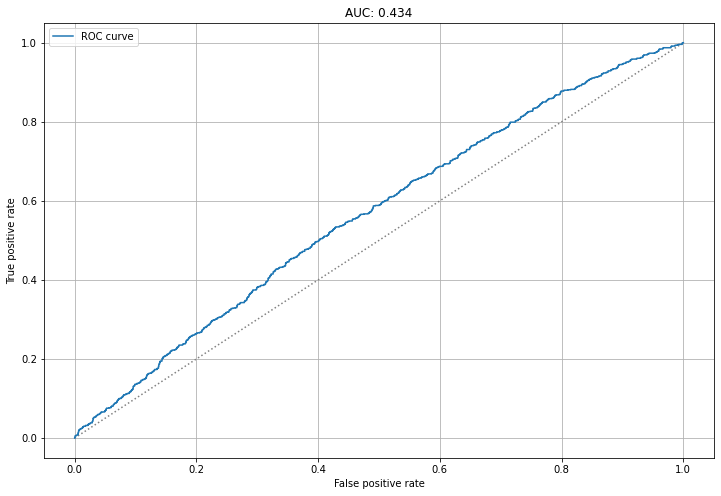

In [7]:
%matplotlib inline
df_test1 = df_test.copy()
df_test1['pred'] = percep.predict(df_test[tag_list].to_numpy())

tpr, fpr, _ = roc_curve(df_test1[goal], df_test1['pred'])
auc = roc_auc_score(df_test1[goal], df_test1['pred'])

plt.figure(0, figsize=(12, 8))
plt.plot([0,1], [0,1], color= "grey", ls= ":")
plt.plot(fpr, tpr, label= "ROC curve")
#plt.plot(fpr, np.linspace(0, 1, fpr.shape[0]), label= "False Positive Rate")
plt.title("AUC: " + str(auc)[:5])
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.grid()
plt.legend()

In [8]:
model = Sequential([
    layers.Input(shape=(32,)),
    layers.Dense(500, activation="relu"),
    layers.BatchNormalization(axis=1),
    layers.Dense(500, activation="relu"),
    layers.BatchNormalization(axis=1),
    layers.Dense(500, activation="relu"),
    layers.BatchNormalization(axis=1),
    layers.Dense(500, activation="relu"),
    layers.BatchNormalization(axis=1),
    layers.Dense(1, activation="sigmoid")
    ])
model.summary()
model.compile(optimizer="adam", loss='mean_squared_error') 
model.fit(df_train[tag_list],df_train[goal],epochs=200,verbose=1)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               16500     
_________________________________________________________________
batch_normalization (BatchNo (None, 500)               2000      
_________________________________________________________________
dense_1 (Dense)              (None, 500)               250500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 500)               2000      
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
batch_normalization_2 (Batch (None, 500)               2000      
____

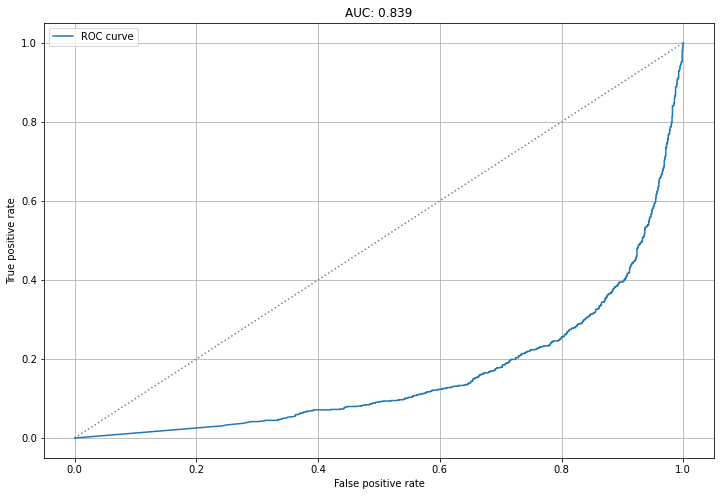

In [11]:
%matplotlib inline
df_test2 = df_test.copy()
df_test2['pred'] = model.predict(df_test[tag_list].to_numpy())

tpr, fpr, _ = roc_curve(df_test2[goal], df_test2['pred'])
auc = roc_auc_score(df_test2[goal], df_test2['pred'])

plt.figure(0, figsize=(12,8))
plt.plot([0,1], [0,1], color= "grey", ls= ":")
plt.plot(fpr, tpr, label= "ROC curve")
#plt.plot(fpr, np.linspace(0, 1, fpr.shape[0]), label= "False Positive Rate")
plt.title("AUC: " + str(auc)[:5])
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.grid()
plt.legend()